<a href="https://colab.research.google.com/github/vipingupta1907/2011MT22_CS575/blob/main/Assignment_2/D2_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 2 solution for D2.csv by VIPIN_2011MT22**

In [145]:
#importing the libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, Holt, SimpleExpSmoothing)
from sklearn.model_selection import TimeSeriesSplit

In [146]:
#importing the dataset

D2 = pd.read_csv('D2.csv')
data = D2['Sales of shampoo over a three year period']
D2.head(50)

,Year,Sales of shampoo over a three year period
0,1,266.0
1,2,145.9
2,3,183.1
3,4,119.3
4,5,180.3
5,6,168.5
6,7,231.8
7,8,224.5
8,9,192.8
9,10,122.9


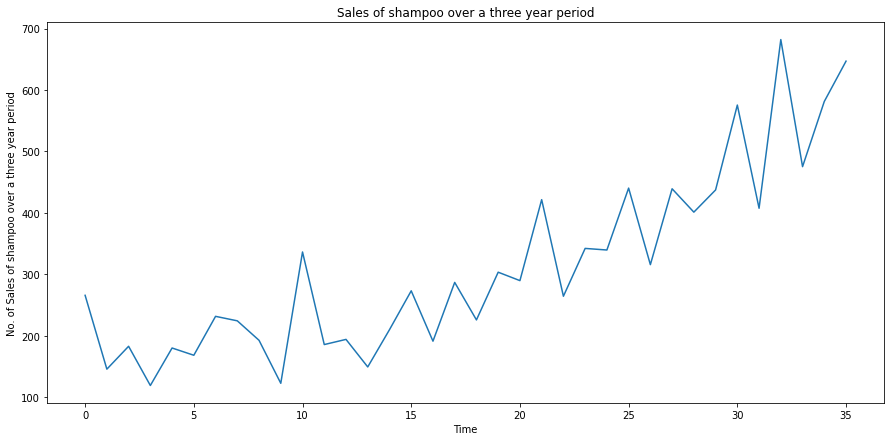

In [147]:
#plotting the time series

plt.figure(figsize=(15, 7))
plt.plot(D2['Sales of shampoo over a three year period'])
plt.xlabel("Time")
plt.ylabel("No. of Sales of shampoo over a three year period")
plt.title('Sales of shampoo over a three year period')
plt.show()

In [148]:
#Defining function for calling data values with interval 'n'

def data_n(arr,interval):
  arr1=[arr[0]]
  for i in range(1,len(arr)):
    if i%interval==0:  
      arr1.append(arr[i])
  return arr1

#Single Exponential Smoothing

In [149]:
#Defining single Exponential Smoothing function with interval 

def single_exponential_smoothing(arr, alpha, interval):
  arr1 = [arr[0]]
  j=1
  for i in range(1, len(arr)):
    if i%interval == 0:
      arr1.append(alpha*arr[i-1] + (1-alpha)*arr1[j-1])
      j+=1
  return arr1

In [150]:
#Calculating mean square error function for single exponential smoothing 

def MSE_SES(arr, alpha, interval):
  Y_true = data_n(arr, interval)
  Y_pred = single_exponential_smoothing(arr, alpha, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE



In [151]:
#calculating mean square error for different combinations of alpha for single exponential smoothing

print("MSE for alpha =.4 is  " ,MSE_SES(data, .4, interval=1), "\n")
print("MSE for alpha =.35 is " ,MSE_SES(data, .35, interval=1), "\n")
print("MSE for alpha =.65 is " ,MSE_SES(data, .65, interval=1), "\n")
print("MSE for alpha =.85 is " ,MSE_SES(data, .85, interval=1), "\n")

MSE for alpha =.4 is   6884.74913443916 

MSE for alpha =.35 is  6984.301365687902 

MSE for alpha =.65 is  7691.369973812569 

MSE for alpha =.85 is  9395.472772372254 



from different combinations of alpha, for alpha = .4, MSE is minimum

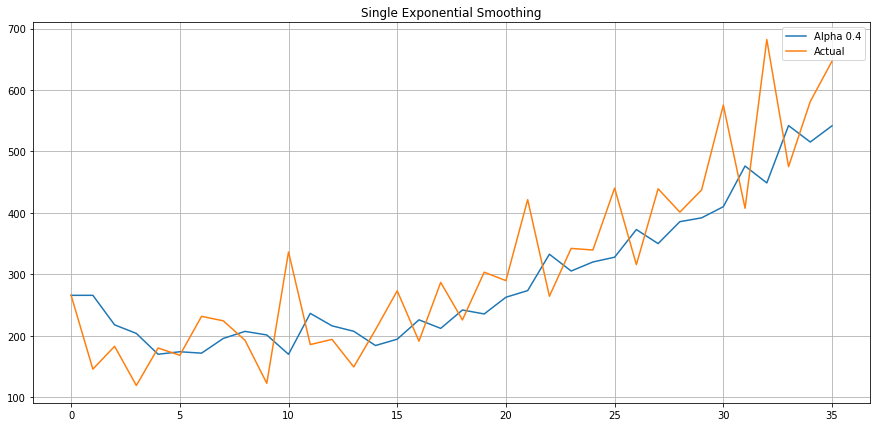

In [152]:
#plotting single exponential smoothing with actual and forecast value

def plot_singleexponentialsmoothing(data, alphas,n):
    plt.figure(figsize=(15, 7))
    for alpha in alphas:
        plt.plot(single_exponential_smoothing(data, alpha,n), label='Alpha {}'.format(alpha))

    plt.plot(data_n(data,n), label='Actual')
    plt.legend(loc='best')
    plt.axis('tight')
    plt.title('Single Exponential Smoothing')
    plt.grid(True)

data = D2['Sales of shampoo over a three year period']
plot_singleexponentialsmoothing(data.values, [.4],1)

#Double Exponential Smoothing

In [153]:
#Defining Double Exponential Smoothing function double_exponential_smoothing with interval 


def double_exponential_smoothing(arr,alpha,beta,interval):
  a=[arr[0]]
  l=len(arr)
  b=[(arr[l-1]-arr[0])/(l-1)]
  arr1 = [arr[0]]
  j=0
  for i in range(1,len(arr)):
      if i%interval==0:
        arr1.append(a[j]+b[j])
        j+=1
        a.append(alpha * arr[i] + (1 - alpha) * (a[j-1]+b[j-1]))
        b.append(beta * (a[j]-a[j-1]) + (1 - beta) * (b[j-1]))        
  return arr1

In [154]:
#Calculating mean square error function for double exponential smoothing 

def MSE_DES(arr, alpha,beta,interval):
  Y_true = data_n(arr, interval)
  Y_pred = double_exponential_smoothing(arr, alpha,beta, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE

In [155]:
#calculating mean square error for different combinations of alpha, beta for double exponential smoothing 

print("MSE for alpha =.4,  beta = .2  is " ,MSE_DES(data, .4, .2 ,interval=1), "\n")
print("MSE for alpha =.35, beta = .5  is " ,MSE_DES(data, .35, .5, interval=1), "\n")
print("MSE for alpha =.85, beta = .6  is " ,MSE_DES(data, .85, .6 ,interval=1), "\n")
print("MSE for alpha =.45, beta = .6  is " ,MSE_DES(data, .45, .6 ,interval=1), "\n")
print("MSE for alpha =.7,  beta = .55 is " ,MSE_DES(data, .7, .55, interval=1), "\n")
print("MSE for alpha =.2,  beta = .6  is " ,MSE_DES(data, .2, .6 ,interval=1), "\n")


MSE for alpha =.4,  beta = .2  is  6251.495541023534 

MSE for alpha =.35, beta = .5  is  6610.952278127306 

MSE for alpha =.85, beta = .6  is  15085.12057948429 

MSE for alpha =.45, beta = .6  is  7634.610258211902 

MSE for alpha =.7,  beta = .55 is  10850.805272566167 

MSE for alpha =.2,  beta = .6  is  5905.518413130033 



from different combinations of alpha & beta, for alpha = .2 & beta = .6, MSE is minimum

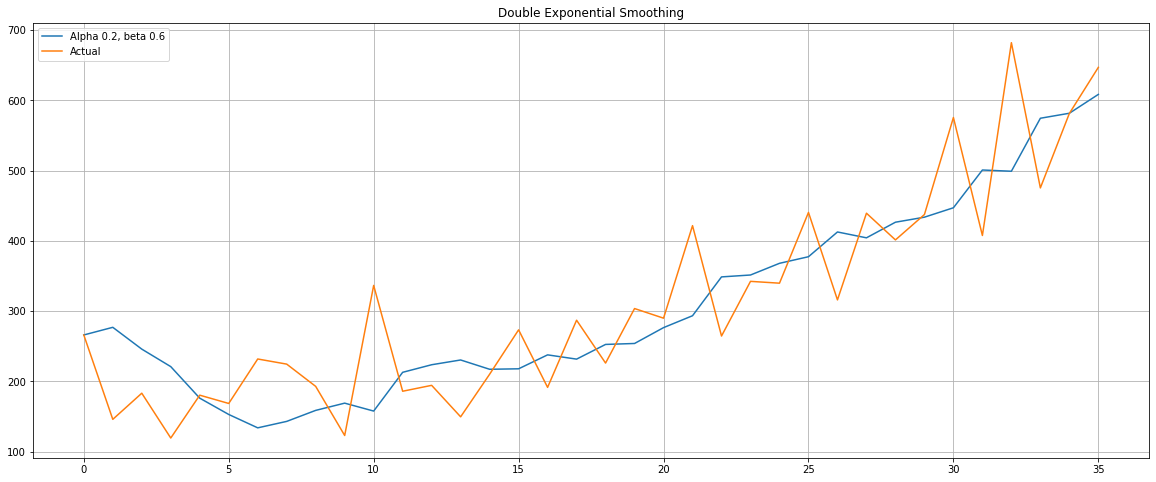

In [156]:
#plotting double exponential smoothing with actual and forecast value

def plot_doubleexponentialsmoothing(data, alphas, betas, interval):
  plt.figure(figsize=(20, 8))
  for alpha, beta in zip(alphas, betas):
    results = double_exponential_smoothing(data, alpha, beta, interval)
    plt.plot(results, label='Alpha {}, beta {}'.format(alpha, beta))
  plt.plot(data_n(data,interval), label='Actual')
  plt.legend(loc='best')
  plt.axis('tight')
  plt.title('Double Exponential Smoothing')
  plt.grid(True)

plot_doubleexponentialsmoothing(data.values, [.2], [0.6], 1)


#Triple Exponential Smoothing

In [157]:
#Defining Triple Exponential Smoothing function double_exponential_smoothing with interval 

def initial_trend(data, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(data[i+slen] - data[i]) / slen
    return sum / slen

def initial_seasonal_components(data, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(data)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(data[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += data[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

def triple_exponential_smoothing(data, slen, alpha, beta, gamma, interval):
    data2 = data_n(data,interval)
    result = []
    seasonals = initial_seasonal_components(data2, slen)
    for i in range(len(data2)):
        if i == 0: 
            smooth = data2[0]
            trend = initial_trend(data2, slen)
            result.append(data2[0])
            continue
        if i >= len(data2): 
            m = i - len(data2) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = data2[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [158]:
#Calculating mean square error function for Triple exponential smoothing 

def MSE_TES(arr,slen, alpha,beta,gamma, interval):
  Y_true = data_n(arr, interval)
  Y_pred = triple_exponential_smoothing(arr,slen , alpha,beta, gamma, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE

In [159]:
#calculating mean square error for different combinations of alpha, beta, gamma for triple exponential smoothing

print("MSE for alpha =.4,  beta = .2,  gamma = .5  is " ,MSE_TES(data,12, .4, .2 , .5,interval=1), "\n")
print("MSE for alpha =.35, beta = .5,  gamma = .3  is " ,MSE_TES(data,12, .35, .5, .3, interval=1), "\n")
print("MSE for alpha =.45, beta = .6,  gamma = .4  is " ,MSE_TES(data,12, .45, .6, .4 ,interval=1), "\n")
print("MSE for alpha =.4,  beta = .2,  gamma = .5  is " ,MSE_TES(data,12, .4, .2 , .5,interval=1), "\n")
print("MSE for alpha =.3,  beta = .5,  gamma = .55 is " ,MSE_TES(data,12, .3, .5, .55, interval=1), "\n")
print("MSE for alpha =.45, beta = .65, gamma = .45 is " ,MSE_TES(data,12, .45, .65, .45 ,interval=1), "\n")
print("MSE for alpha =.7,  beta = .25, gamma = .50 is " ,MSE_TES(data,12, .7, .25 , .50,interval=1), "\n")
print("MSE for alpha =.35, beta = .2,  gamma = .1  is " ,MSE_TES(data,12, .35, .2, .1, interval=1), "\n")
print("MSE for alpha =.9,  beta = .2,  gamma = .1  is " ,MSE_TES(data, 12, .9, .2,.1 ,interval=1), "\n")
print("MSE for alpha =.85, beta = .3,  gamma = .1  is " ,MSE_TES(data,12, .85, .3, .1 ,interval=1), "\n")


MSE for alpha =.4,  beta = .2,  gamma = .5  is  709.9940405035734 

MSE for alpha =.35, beta = .5,  gamma = .3  is  1527.7285213064113 

MSE for alpha =.45, beta = .6,  gamma = .4  is  850.5599520088258 

MSE for alpha =.4,  beta = .2,  gamma = .5  is  709.9940405035734 

MSE for alpha =.3,  beta = .5,  gamma = .55 is  988.5170438880336 

MSE for alpha =.45, beta = .65, gamma = .45 is  778.281905504115 

MSE for alpha =.7,  beta = .25, gamma = .50 is  249.42171723260967 

MSE for alpha =.35, beta = .2,  gamma = .1  is  2141.1462016401615 

MSE for alpha =.9,  beta = .2,  gamma = .1  is  174.5459022726573 

MSE for alpha =.85, beta = .3,  gamma = .1  is  261.80190770871206 



from different combinations of alpha, beta, gamma ,
 for alpha = .9 , beta = .2   , gamma= .1   , MSE is minimum

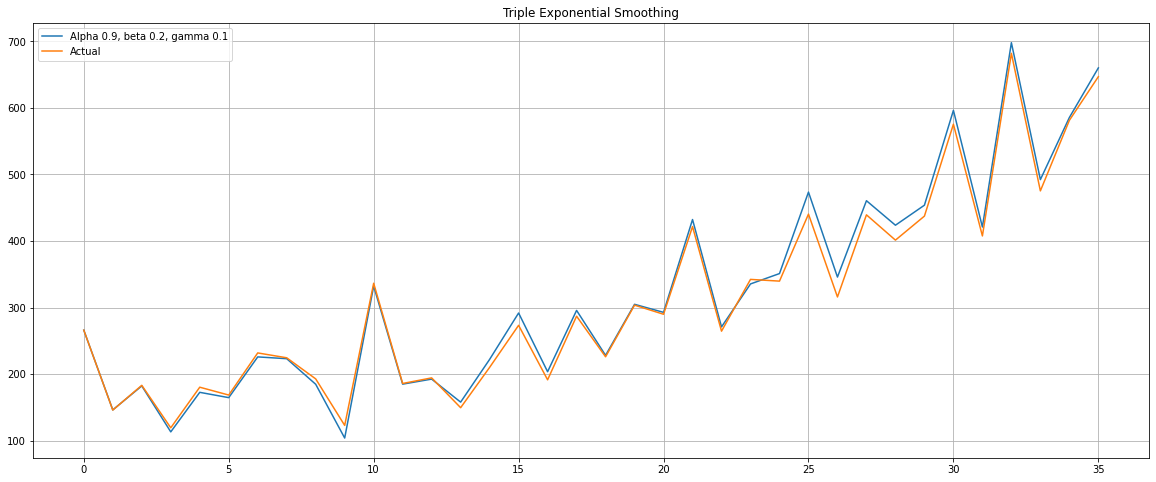

In [160]:
#plotting the triple exponential function with actual and predicted value

def plot_triple_exponential_smoothing(data, slen, alphas, betas,gammas, interval):
  plt.figure(figsize=(20, 8))
  for alpha, beta , gamma in zip(alphas, betas, gammas):
    results = triple_exponential_smoothing(data, slen, alpha, beta, gamma,interval)
    plt.plot(results, label='Alpha {}, beta {}, gamma {}'.format(alpha, beta, gamma))
  plt.plot(data_n(data,interval), label='Actual')
  plt.legend(loc='best')
  plt.axis('tight')
  plt.title('Triple Exponential Smoothing')
  plt.grid(True)

plot_triple_exponential_smoothing(data.values, 12,[0.9], [0.2], [.1], 1)

#KPSS Test

In [161]:
#define function for kpss test

from statsmodels.tsa.stattools import kpss
def kpss_test(atr):
    timeseries = D2[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('Sales of shampoo over a three year period')

Results of KPSS Test for  Sales of shampoo over a three year period
Test Statistic            0.439388
p-value                   0.060178
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


>For the given dataset D2 , the value of the test statistic is less than the critical value at most confidence intervals in the KPSS test, hence we fail to reject the null hypothesis i.e. the series is stationary.

#ADF Test

In [163]:
#define function for ADF test

from statsmodels.tsa.stattools import adfuller

def adf_test(atr):
    timeseries = D2[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

adf_test('Sales of shampoo over a three year period')

Results of Dickey-Fuller Test for  Sales of shampoo over a three year period 

Test Statistic                  3.060142
p-value                         1.000000
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


>For the given dataset D2 , the value of the test statistic is greater than the critical value at all confidence intervals in the ADF test, also p-value  is 1.000000, which is more than 0.05. so the series is non stationary.

Note:  The signed values should be compared and not the absolute values.

**from the result of both test it is concluded as Trend Stationary.**

#single exponential smoothing with different intervals

In [164]:
#prediction of alpha beta gamma for minimum MSE for i month inervals for single exponential smoothing

print("MSE for alpha =.85 with interval = 1 months is " , MSE_SES(data, .85, interval=1), "\n")
print("MSE for alpha =..8 with interval = 1 months is " , MSE_SES(data, .8, interval=1), "\n")
print("MSE for alpha =..7 with interval = 1 months is " , MSE_SES(data, .7, interval=1), "\n")

MSE for alpha =.85 with interval = 1 months is  9395.472772372254 

MSE for alpha =..8 with interval = 1 months is  8880.660902334475 

MSE for alpha =..7 with interval = 1 months is  8032.361275604554 



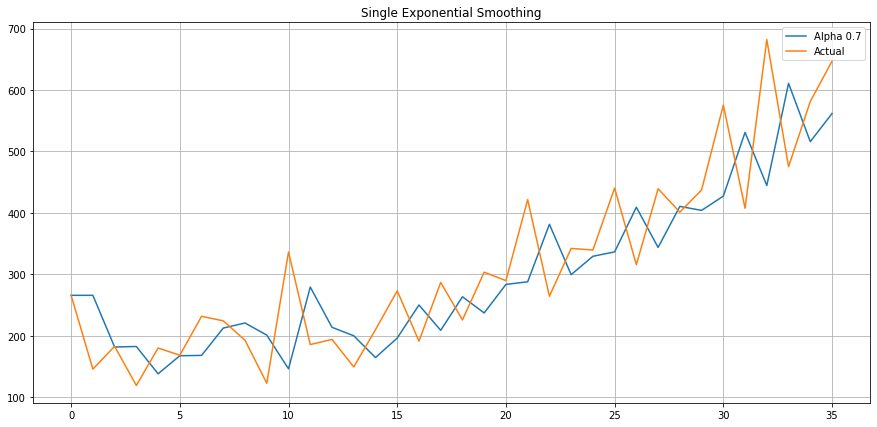

In [165]:
# plotting for least MSE for 1 month intervals according to bar chart for single exponential function

plot_singleexponentialsmoothing(data.values, [.7],1)

In [166]:
#prediction of alpha beta gamma for minimum MSE for 2 month inervals for single exponential smoothing

print("MSE for alpha =.85 with interval = 2 months is " , MSE_SES(data, .85, interval=2), "\n")
print("MSE for alpha =.7 with interval = 2 months is " , MSE_SES(data, .7, interval=2), "\n")
print("MSE for alpha =.9 with interval = 2 months is " , MSE_SES(data, .9, interval=2), "\n")

MSE for alpha =.85 with interval = 2 months is  10984.827180686982 

MSE for alpha =.7 with interval = 2 months is  10062.480554978009 

MSE for alpha =.9 with interval = 2 months is  11328.087538075597 



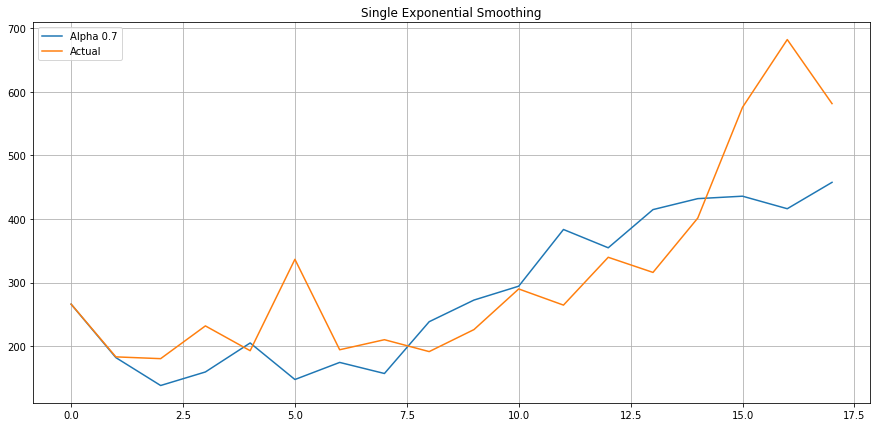

In [167]:
# plotting for least MSE for 2 month intervals according to bar chart for single exponential function

plot_singleexponentialsmoothing(data.values, [.7],2)

In [168]:
#prediction of alpha beta gamma for minimum MSE for 4 month inervals for single exponential smoothing

print("MSE for alpha =.85 with interval = 4 months is " , MSE_SES(data, .85, interval=4), "\n")
print("MSE for alpha =.7 with interval = 4 months  is " , MSE_SES(data, .7, interval=4), "\n")
print("MSE for alpha =.75 with interval = 4 months is " , MSE_SES(data, .75, interval=4), "\n")

MSE for alpha =.85 with interval = 4 months is  9030.005784464665 

MSE for alpha =.7 with interval = 4 months  is  8853.328073896251 

MSE for alpha =.75 with interval = 4 months is  8834.924965319518 



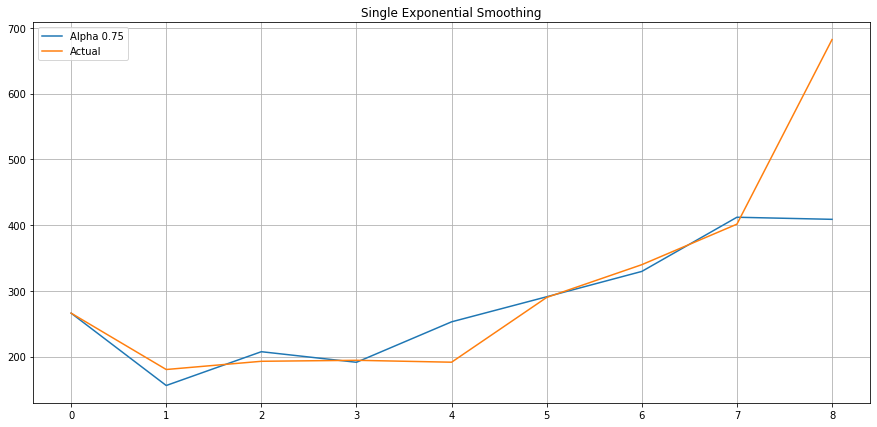

In [169]:
# plotting for least MSE for 4 month intervals according to bar chart for single exponential function

plot_singleexponentialsmoothing(data.values, [.75],4)

In [170]:
#prediction of alpha beta gamma for minimum MSE for 8 month inervals for single exponential smoothing

print("MSE for alpha =.85 with interval = 8months is " , MSE_SES(data, .85, interval=8), "\n")
print("MSE for alpha =.7 with interval = 8 months is " , MSE_SES(data, .7, interval=8), "\n")
print("MSE for alpha =.9 with interval = 8 months is " , MSE_SES(data, .9, interval=8), "\n")

MSE for alpha =.85 with interval = 8months is  17790.046623309296 

MSE for alpha =.7 with interval = 8 months is  19631.3038722705 

MSE for alpha =.9 with interval = 8 months is  17327.781209374498 



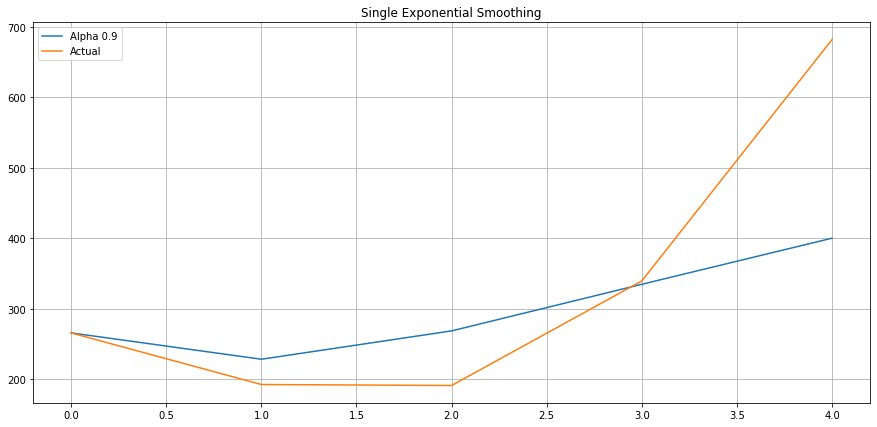

In [171]:
# plotting for least MSE for 8 month intervals according to bar chart for single exponential function

plot_singleexponentialsmoothing(data.values, [.9],8)

In [172]:
#prediction of alpha beta gamma for minimum MSE for 12 month inervals for single exponential smoothing

print("MSE for alpha =..85 with interval = 12 months is " , MSE_SES(data, .85, interval=12), "\n")
print("MSE for alpha =.9 with interval = 12 months   is " , MSE_SES(data, .9, interval=12), "\n")
print("MSE for alpha =.95 with interval = 12 months  is " , MSE_SES(data, .95, interval=12), "\n")

MSE for alpha =..85 with interval = 12 months is  125.42202002083333 

MSE for alpha =.9 with interval = 12 months   is  49.98174033333314 

MSE for alpha =.95 with interval = 12 months  is  14.837971687499987 



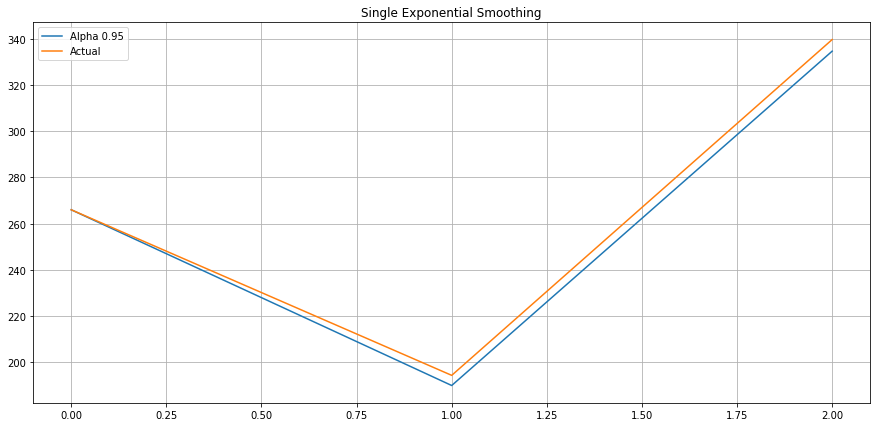

In [173]:
# plotting for least MSE for 12 month intervals according to bar chart for single exponential function

plot_singleexponentialsmoothing(data.values, [.95],12)

In [174]:
#prediction of alpha beta gamma for minimum MSE for 24 month inervals for single exponential smoothing

print("MSE for alpha =.85 with interval = 24 months is " , MSE_SES(data, .85, interval=24), "\n")
print("MSE for alpha =.9 with interval = 24 months is " , MSE_SES(data, .9, interval=24), "\n")
print("MSE for alpha =.95 with interval = 24 months is " , MSE_SES(data, .95, interval=24), "\n")

MSE for alpha =.85 with interval = 24 months is  39.11701249999974 

MSE for alpha =.9 with interval = 24 months is  12.650450000000149 

MSE for alpha =.95 with interval = 24 months is  0.7381124999999696 



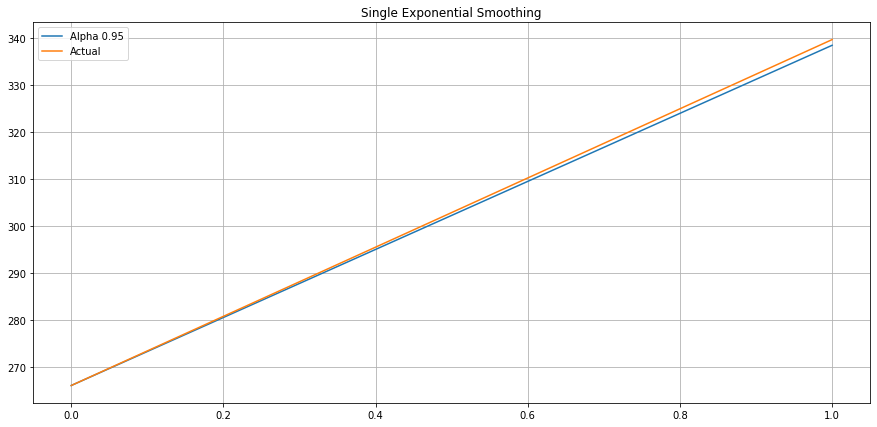

In [175]:
# plotting for least MSE for 24 month intervals according to bar chart for single exponential function

plot_singleexponentialsmoothing(data.values, [.95],24)

In [176]:
#prediction of alpha beta gamma for minimum MSE for 48 month inervals for single exponential smoothing

print("MSE for alpha =.85 with interval = 48 months is " , MSE_SES(data, .85, interval=48), "\n")
print("MSE for alpha =.8 with interval = 48 months is " , MSE_SES(data, .8, interval=48), "\n")
print("MSE for alpha =.95 with interval = 48 months is " , MSE_SES(data, .95, interval=48), "\n")

MSE for alpha =.85 with interval = 48 months is  0.0 

MSE for alpha =.8 with interval = 48 months is  0.0 

MSE for alpha =.95 with interval = 48 months is  0.0 



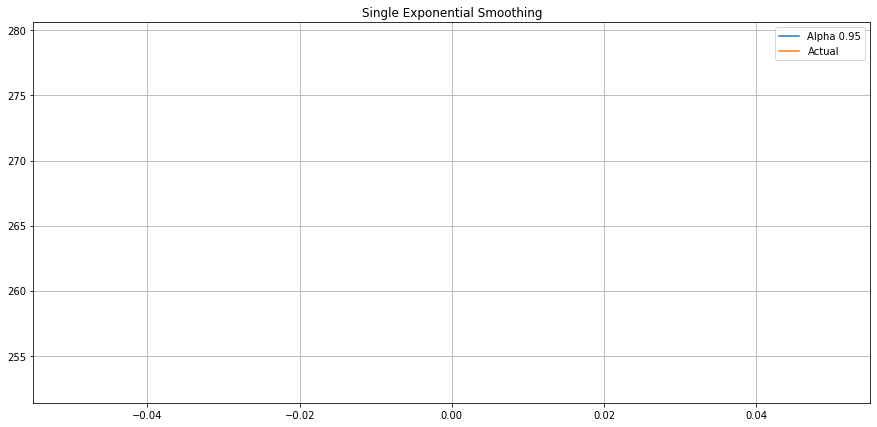

In [177]:
# plotting for least MSE for 48 month intervals according to bar chart for single exponential function

plot_singleexponentialsmoothing(data.values, [.95],48)

In [178]:
#tabulate minimum MSE for different intervals for single exponential smoothing

from tabulate import tabulate
print(tabulate([['1 month', 8032], ['2 month', 10062],['4 month', 8834],['8 month', 17327],['12 month', 14],['24 month', .7],['48 month', 0]], headers=['intervals', 'minimum MSE'], tablefmt='orgtbl'))

| intervals   |   minimum MSE |
|-------------+---------------|
| 1 month     |        8032   |
| 2 month     |       10062   |
| 4 month     |        8834   |
| 8 month     |       17327   |
| 12 month    |          14   |
| 24 month    |           0.7 |
| 48 month    |           0   |


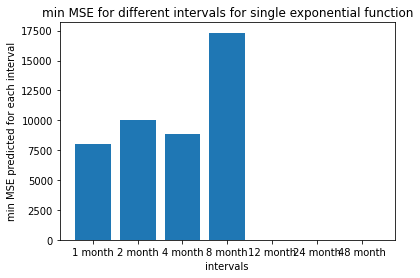

In [179]:
# Bar chart comparison for min MSE of different intervals for single exponential function

import matplotlib.pyplot as plt
plt.bar(['1 month','2 month','4 month','8 month','12 month','24 month','48 month'], [8032,10062,8834,17327,14,.7,0])
plt.title('min MSE for different intervals for single exponential function')
plt.xlabel('intervals')
plt.ylabel('min MSE predicted for each interval')
plt.show()

#Double exponential smoothing with different intervals

In [180]:
#prediction of alpha beta gamma for minimum MSE for 1 month inervals for Double exponential smoothing

print("MSE for alpha =.85, beta = .6 with interval = 1 month  is  " ,MSE_DES(data, .85, .6 ,interval=1), "\n")
print("MSE for alpha =.75, beta = .5 with interval = 1 month  is  " ,MSE_DES(data, .75, .5 ,interval=1), "\n")
print("MSE for alpha =.8, beta = .4 with interval = 1 month   is  " ,MSE_DES(data, .8, .4 ,interval=1), "\n")

MSE for alpha =.85, beta = .6 with interval = 1 month  is   15085.12057948429 

MSE for alpha =.75, beta = .5 with interval = 1 month  is   11431.05442364355 

MSE for alpha =.8, beta = .4 with interval = 1 month   is   11557.888906684966 



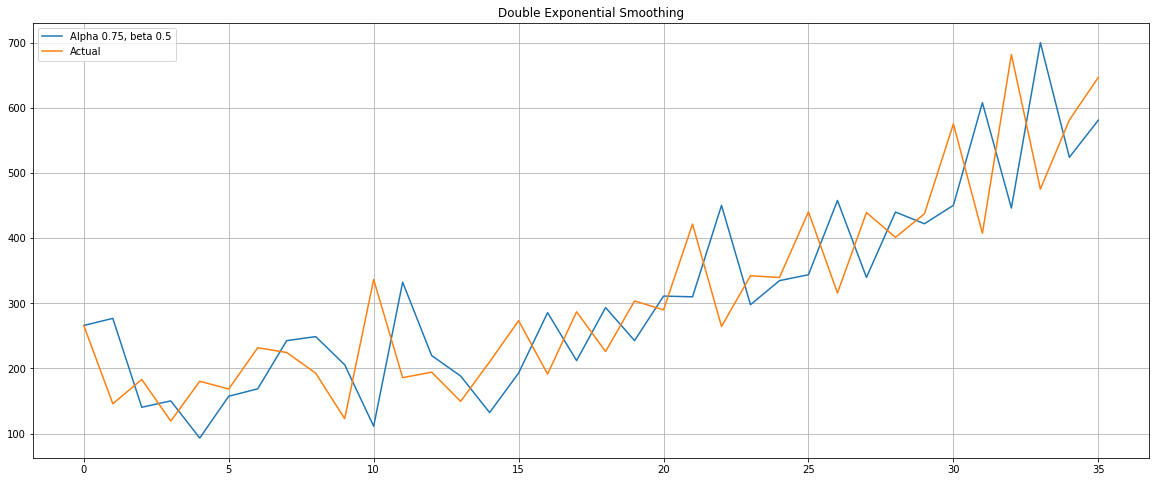

In [181]:
# plotting for least MSE for 1 month intervals according to bar chart for double exponential function

plot_doubleexponentialsmoothing(data.values, [0.75], [0.5], 1)

In [182]:
#prediction of alpha beta gamma for minimum MSE for 2 month inervals for Double exponential smoothing

print("MSE for alpha =.85, beta = .5 with interval = 1 month is  " ,MSE_DES(data, .85, .5 ,interval=2), "\n")
print("MSE for alpha =.9, beta = .6 with interval = 1 month  is  " ,MSE_DES(data, .9, .6 ,interval=2), "\n")
print("MSE for alpha =.7, beta = .4 with interval = 1 month  is  " ,MSE_DES(data, .7, .4 ,interval=2), "\n")


MSE for alpha =.85, beta = .5 with interval = 1 month is   8451.21863659178 

MSE for alpha =.9, beta = .6 with interval = 1 month  is   9379.294606869013 

MSE for alpha =.7, beta = .4 with interval = 1 month  is   7249.183833435512 



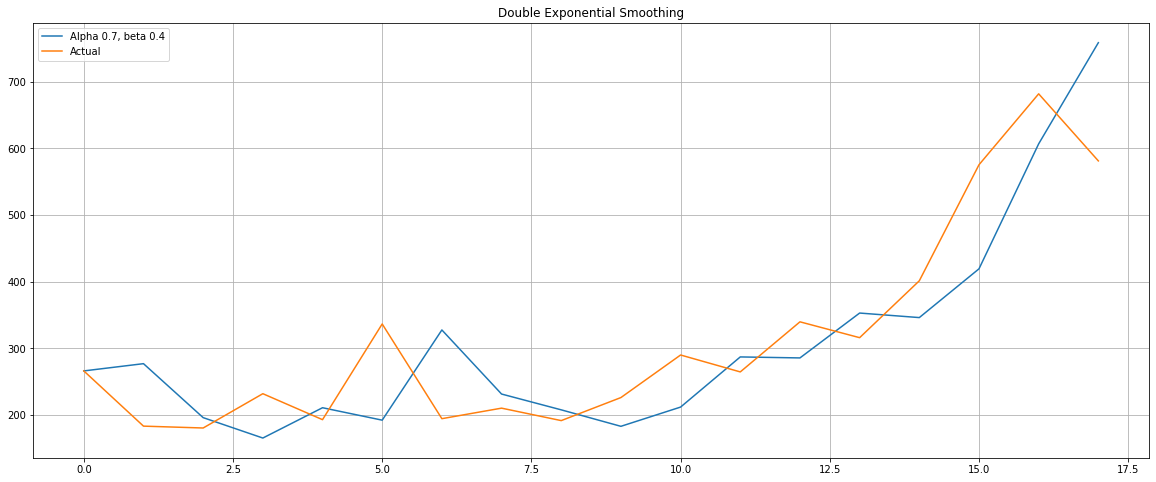

In [183]:
# plotting for least MSE for 2 month intervals according to bar chart for double exponential function

plot_doubleexponentialsmoothing(data.values, [0.7], [0.4], 2)

In [184]:
#prediction of alpha beta gamma for minimum MSE for 4 month inervals for Double exponential smoothing

print("MSE for alpha =.85, beta = .6 with interval = 1 month  is  " ,MSE_DES(data, .85, .6 ,interval=2), "\n")
print("MSE for alpha =.8, beta = .65 with interval = 1 month  is  " ,MSE_DES(data, .8, .65 ,interval=2), "\n")
print("MSE for alpha =.8, beta = .55 with interval = 1 month  is  " ,MSE_DES(data, .8, .55 ,interval=2), "\n")

MSE for alpha =.85, beta = .6 with interval = 1 month  is   9017.0161036051 

MSE for alpha =.8, beta = .65 with interval = 1 month  is   8975.848170487767 

MSE for alpha =.8, beta = .55 with interval = 1 month  is   8437.849526251159 



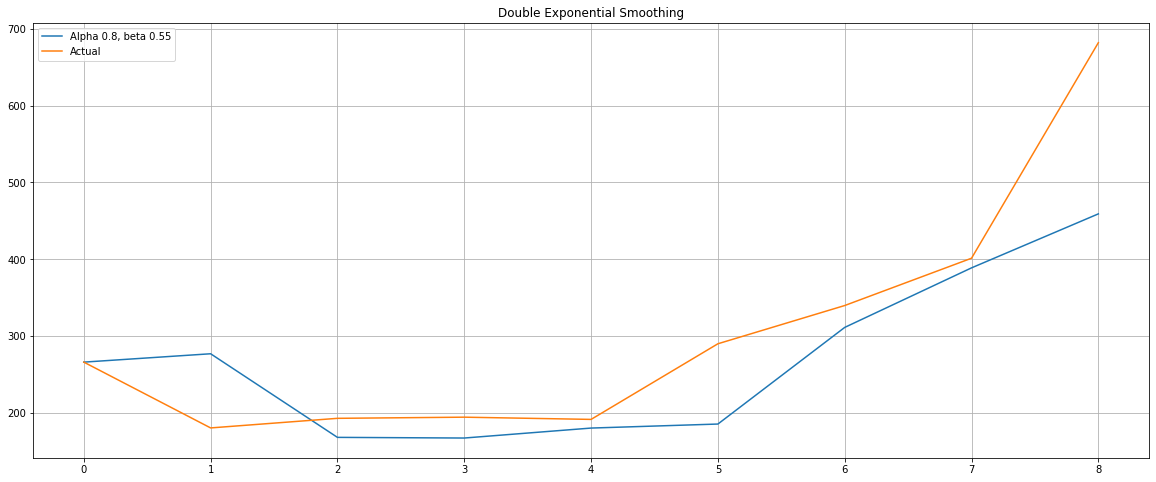

In [185]:
# plotting for least MSE for 4 month intervals according to bar chart for double exponential function

plot_doubleexponentialsmoothing(data.values, [0.8], [0.55], 4)

In [186]:
#prediction of alpha beta gamma for minimum MSE for 8 month inervals for Double exponential smoothing

print("MSE for alpha =.75, beta = .5 with interval = 1 month   is  " ,MSE_DES(data, .75, .5 ,interval=2), "\n")
print("MSE for alpha =.8, beta = .4 with interval = 1 month    is  " ,MSE_DES(data, .8, .4 ,interval=2), "\n")
print("MSE for alpha =.85, beta = .55 with interval = 1 month  is  " ,MSE_DES(data, .85, .55 ,interval=2), "\n")

MSE for alpha =.75, beta = .5 with interval = 1 month   is   7918.221939439468 

MSE for alpha =.8, beta = .4 with interval = 1 month    is   7667.726638000986 

MSE for alpha =.85, beta = .55 with interval = 1 month  is   8732.571538680095 



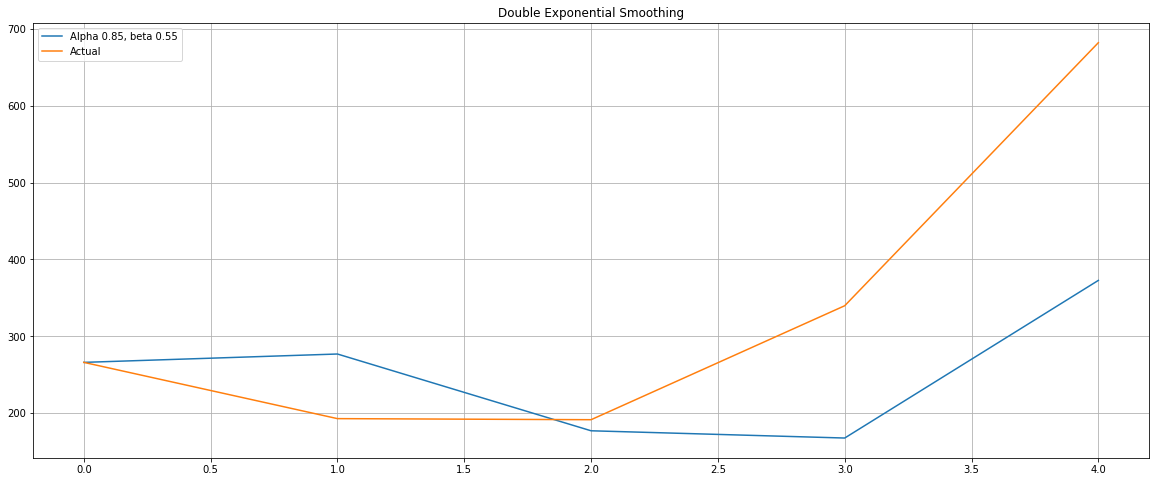

In [187]:
# plotting for least MSE for 8 month intervals according to bar chart for double exponential function

plot_doubleexponentialsmoothing(data.values, [0.85], [0.55], 8)

In [188]:
#prediction of alpha beta gamma for minimum MSE for 12 month inervals for Double exponential smoothing

print("MSE for alpha =.85, beta = .5 with interval = 12 month is  " ,MSE_DES(data, .5, .5 ,interval=12), "\n")
print("MSE for alpha =.9, beta = .4 with interval = 12 month  is  " ,MSE_DES(data, .4, .4 ,interval=12), "\n")
print("MSE for alpha =.9, beta = .5 with interval = 12 month  is  " ,MSE_DES(data, .3, .5 ,interval=12), "\n")

MSE for alpha =.85, beta = .5 with interval = 12 month is   6595.543512925168 

MSE for alpha =.9, beta = .4 with interval = 12 month  is   5486.458447068296 

MSE for alpha =.9, beta = .5 with interval = 12 month  is   4919.375778068027 



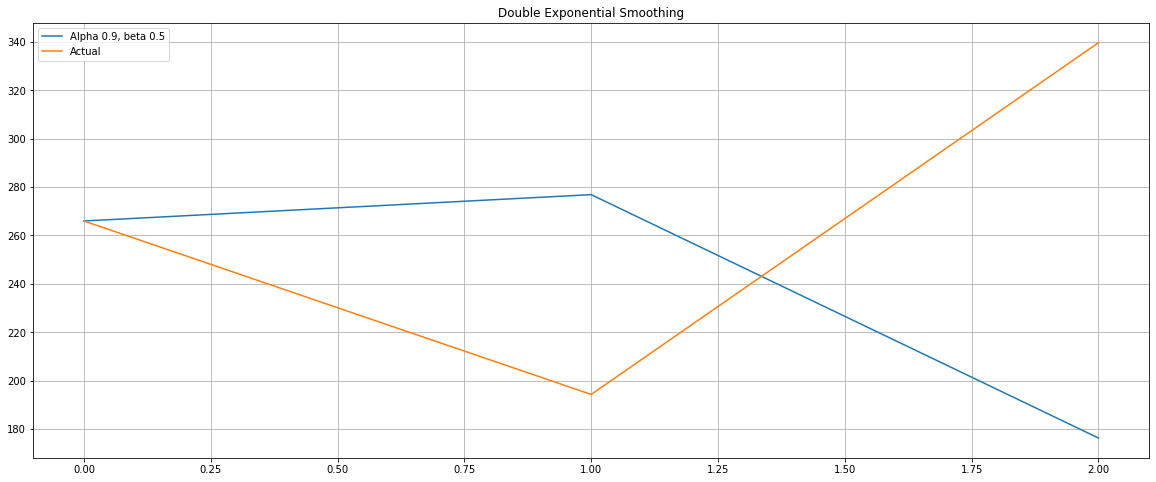

In [189]:
# plotting for least MSE for 12 month intervals according to bar chart for double exponential function

plot_doubleexponentialsmoothing(data.values, [0.9], [0.5], 12)

In [190]:
#prediction of alpha beta gamma for minimum MSE for 24 month inervals for Double exponential smoothing

print("MSE for alpha =.85, beta = .5 with interval = 24 month  is  " ,MSE_DES(data, .85, .5 ,interval=24), "\n")
print("MSE for alpha =.9, beta = .55 with interval = 24 month  is  " ,MSE_DES(data, .9, .55 ,interval=24), "\n")
print("MSE for alpha =.9, beta = .6 with interval = 24 month   is  " ,MSE_DES(data, .9, .6 ,interval=24), "\n")

MSE for alpha =.85, beta = .5 with interval = 24 month  is   1972.9967183673477 

MSE for alpha =.9, beta = .55 with interval = 24 month  is   1972.9967183673477 

MSE for alpha =.9, beta = .6 with interval = 24 month   is   1972.9967183673477 



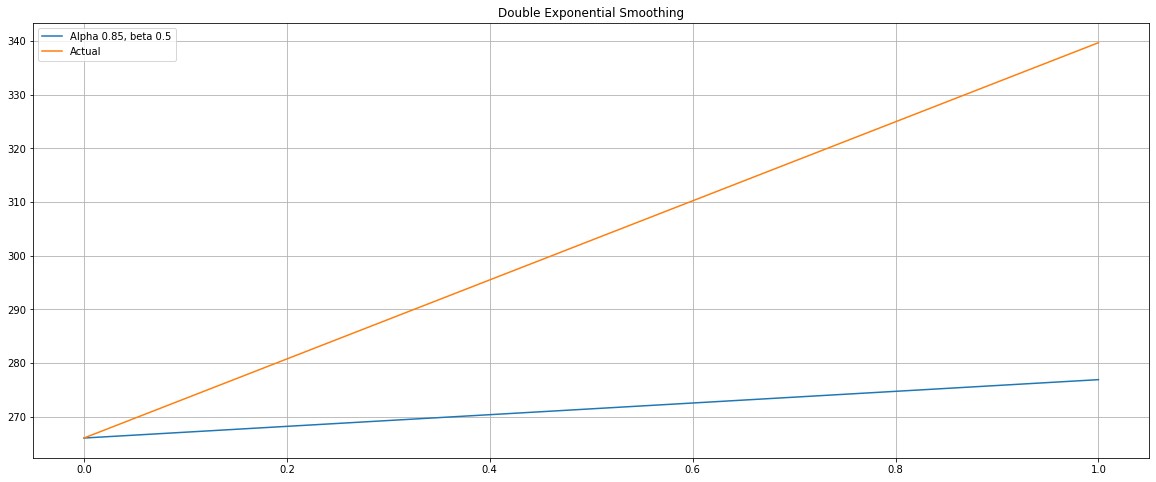

In [191]:
# plotting for least MSE for 24 month intervals according to bar chart for double exponential function

plot_doubleexponentialsmoothing(data.values, [0.85], [0.5], 24)

In [192]:
#prediction of alpha beta gamma for minimum MSE for 48 month inervals for Double exponential smoothing

print("MSE for alpha =.85, beta = .5 with interval = 48 month  is  " ,MSE_DES(data, .85, .5 ,interval=48), "\n")
print("MSE for alpha =.9, beta = .55 with interval = 48 month  is  " ,MSE_DES(data, .9, .55 ,interval=48), "\n")
print("MSE for alpha =.9, beta = .6 with interval = 48 month   is  " ,MSE_DES(data, .9, .6 ,interval=48), "\n")

MSE for alpha =.85, beta = .5 with interval = 48 month  is   0.0 

MSE for alpha =.9, beta = .55 with interval = 48 month  is   0.0 

MSE for alpha =.9, beta = .6 with interval = 48 month   is   0.0 



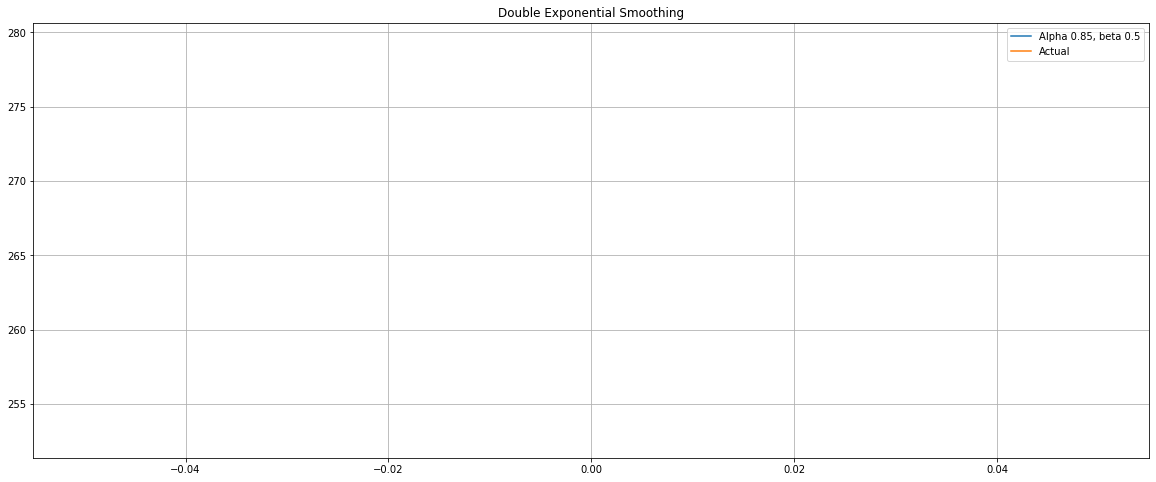

In [193]:
# plotting for least MSE for 48 month intervals according to bar chart for double exponential function

plot_doubleexponentialsmoothing(data.values, [0.85], [0.5], 48)

In [194]:
#tabulate minimum MSE for different intervals for double exponential smoothing

from tabulate import tabulate
print(tabulate([['1 month', 11431], ['2 month', 7249],['4 month', 8437],['8 month', 1972],['12 month', 1866],['24 month', 2022],['48 month', 0]], headers=['intervals', 'minimum MSE'], tablefmt='orgtbl'))

| intervals   |   minimum MSE |
|-------------+---------------|
| 1 month     |         11431 |
| 2 month     |          7249 |
| 4 month     |          8437 |
| 8 month     |          1972 |
| 12 month    |          1866 |
| 24 month    |          2022 |
| 48 month    |             0 |


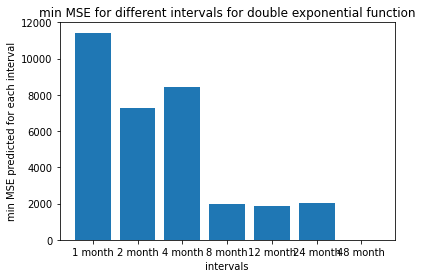

In [195]:
# Bar chart comparison for min MSE of different intervals for double exponential function

import matplotlib.pyplot as plt
plt.bar(['1 month','2 month','4 month','8 month','12 month','24 month','48 month'], [11431,7249,8437,1972,1866,2022,0])
plt.title('min MSE for different intervals for double exponential function')
plt.xlabel('intervals')
plt.ylabel('min MSE predicted for each interval')
plt.show()

#Triple exponential smoothing with different intervals

In [113]:
#prediction of alpha beta gamma for minimum MSE for 1 month inervals for triple exponential smoothing

print("MSE for alpha =.9, beta = .2, gamma = .1 with interval = 1 month is " ,MSE_TES(data,12, .9, .2 , .1,interval=1), "\n")
print("MSE for alpha =.9, beta = .2, gamma = .2 with interval = 1 month is " ,MSE_TES(data,12, .9, .2 , .2,interval=1), "\n")
print("MSE for alpha =.85, beta = .2, gamma = .2 with interval = 1 monthis " ,MSE_TES(data,12, .85, .2 , .2,interval=1), "\n")

MSE for alpha =.9, beta = .2, gamma = .1 with interval = 1 hour is  174.5459022726573 

MSE for alpha =.9, beta = .2, gamma = .2 with interval = 1 hour is  176.44456130879294 

MSE for alpha =.85, beta = .2, gamma = .2 with interval = 1 houris  183.94336832860975 



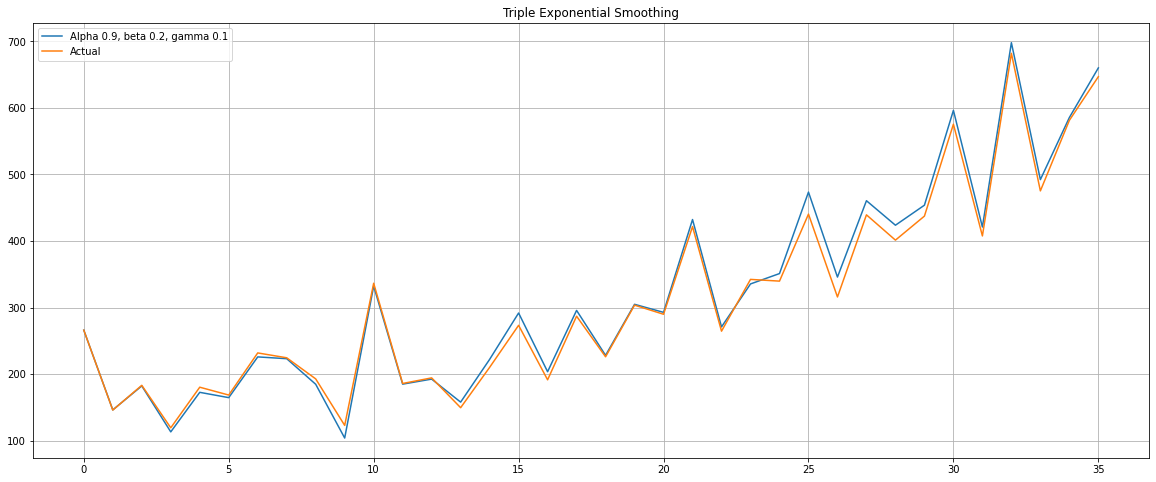

In [114]:
# plotting for least MSE for 1 month according to bar chart for triple exponential function

plot_triple_exponential_smoothing(data.values, 12,[0.9], [0.2], [.1], 1)

In [115]:
#prediction of alpha beta gamma for minimum MSE for 2 month inervals for triple exponential smoothing

print("MSE for alpha =.9, beta = .2, gamma = .1 with interval = 2 month   is " ,MSE_TES(data,12, .9, .2 , .1,interval=2), "\n")
print("MSE for alpha =.9, beta = .2, gamma = .15 with interval = 2 month  is " ,MSE_TES(data,12, .9, .2 , .15,interval=2), "\n")
print("MSE for alpha =.85, beta = .2, gamma = .15 with interval = 2 month is " ,MSE_TES(data,12, .85, .2 , .15,interval=2), "\n")

IndexError: ignored

In [134]:
#prediction of alpha beta gamma for minimum MSE for different inervals for triple exponential smoothing

print("MSE for interval = 8 month is " ,"unable to find as no of month in seassion is 2", "\n")
print("MSE for interval = 12 month is " ,"unable to find as no of month in seassion is 4", "\n")
print("MSE for interval = 24 month is " ,"unable to find as no of month in seassion is 8", "\n")
print("MSE for interval = 48 month is " ,"unable to find as no of month in seassion is 12", "\n")
print("MSE for interval = 48 month is " ,"unable to find as no of month in seassion is 24", "\n")

MSE for interval = 8 month is  unable to find as no of month in seassion is 2 

MSE for interval = 12 month is  unable to find as no of month in seassion is 4 

MSE for interval = 24 month is  unable to find as no of month in seassion is 8 

MSE for interval = 48 month is  unable to find as no of month in seassion is 12 

MSE for interval = 48 month is  unable to find as no of month in seassion is 24 



In [137]:
#tabulate minimum MSE for different intervals for triple exponential smoothing

from tabulate import tabulate
print(tabulate([['1 month', 192], ['2 month', 'unable to find as no of month in seassion is 12'],['4 month', 'unable to find as no of month in seassion is 12'],['8 month', 'unable to find as no of month in seassion is 12'],['12 month', 'unable to find as no of month in seassion is 12'],['24 month', "unable to find as no of month in seassion is 12"],['48 month', 'unable to find as no of month in seassion is 12']], headers=['intervals', 'minimum MSE'], tablefmt='orgtbl'))

| intervals   | minimum MSE                                     |
|-------------+-------------------------------------------------|
| 1 month     | 192                                             |
| 2 month     | unable to find as no of month in seassion is 12 |
| 4 month     | unable to find as no of month in seassion is 12 |
| 8 month     | unable to find as no of month in seassion is 12 |
| 12 month    | unable to find as no of month in seassion is 12 |
| 24 month    | unable to find as no of month in seassion is 12 |
| 48 month    | unable to find as no of month in seassion is 12 |


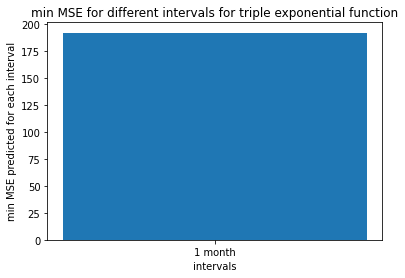

In [138]:
# Bar chart comparison for min MSE of different intervals for triple exponential function

import matplotlib.pyplot as plt
plt.bar(['1 month'], [192])
plt.title('min MSE for different intervals for triple exponential function')
plt.xlabel('intervals')
plt.ylabel('min MSE predicted for each interval')
plt.show()

#Comparison of inbuild function and self made function for single exponential smoothing 

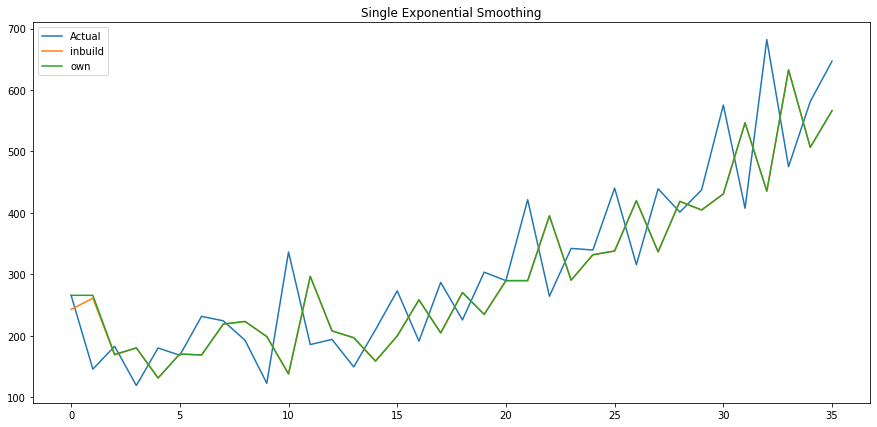

In [196]:
# comparison between inbuild and my own function graph for single exponential smoothing

p= D2
p['inbuild SES']=SimpleExpSmoothing(p['Sales of shampoo over a three year period']).fit(smoothing_level= .8 ,optimized=True).fittedvalues.shift(0)
plt.figure(figsize=(15, 7))
plt.title('Single Exponential Smoothing')
plt.plot(p['Sales of shampoo over a three year period'], label='Actual')
plt.plot(p['inbuild SES'], label='inbuild')
plt.plot(single_exponential_smoothing(data, .8,1), label='own')
plt.legend()

In [197]:
#MSE comparision between inbuild function and own function for single exponential smoothing

inbuildMSE_SES = np.square(np.subtract(p['Sales of shampoo over a three year period'],p['inbuild SES'])).mean() 
print("MSE by inbuild function is " ,inbuildMSE_SES, "\n")
print("MSE by my own function is " ,MSE_SES(data, .85,1), "\n")

MSE by inbuild function is  8865.427684670423 

MSE by my own function is  9395.472772372254 



#Comparison of inbuild function and self made function for Double exponential smoothing 

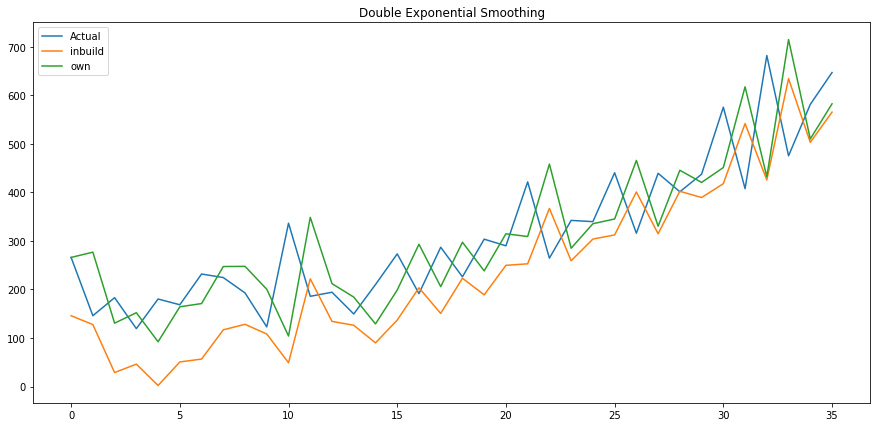

In [198]:
# comparison between inbuild and my own function graph for double exponential smoothing

q= D2
q['inbuild DES']=Holt(q['Sales of shampoo over a three year period']).fit(smoothing_level= .8 , smoothing_slope=.06, optimized=False).fittedvalues.shift(0)
plt.figure(figsize=(15, 7))
plt.title('Double Exponential Smoothing')
plt.plot(q['Sales of shampoo over a three year period'], label='Actual')
plt.plot(q['inbuild DES'], label='inbuild')
plt.plot(double_exponential_smoothing(data, .8,.5, 1), label='own')
plt.legend()


In [199]:
#MSE comparision between inbuild function and own function for double exponential smoothing

inbuildMSE_DES = np.square(np.subtract(q['Sales of shampoo over a three year period'],q['inbuild DES'])).mean() 
print("MSE by inbuild function is " ,inbuildMSE_DES, "\n")
print("MSE by my own function is " ,MSE_DES(data, .85, .5,1), "\n")

MSE by inbuild function is  14609.771419236924 

MSE by my own function is  13783.298196677197 



# Comparison of inbuild function and self made function for Triple exponential smoothing 

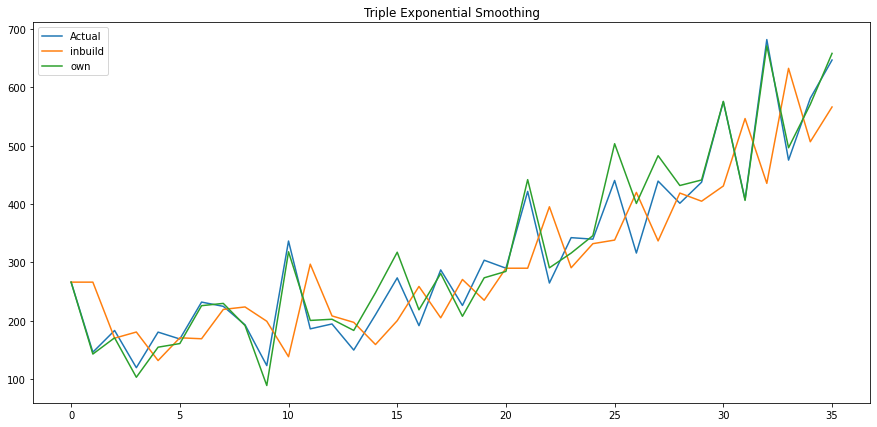

In [200]:
# comparison between inbuild and my own function graph for triple exponential smoothing

r= D2
r['inbuild TES']=ExponentialSmoothing(r['Sales of shampoo over a three year period']).fit(smoothing_level= .8 , smoothing_slope=.06, smoothing_seasonal=0.95, optimized=False).fittedvalues.shift(0)
plt.figure(figsize=(15, 7))
plt.title('Triple Exponential Smoothing')
plt.plot(r['Sales of shampoo over a three year period'], label='Actual')
plt.plot(r['inbuild TES'], label='inbuild')
plt.plot(triple_exponential_smoothing(data,12,.5, .8,.5, 1), label='own')
plt.legend()

In [201]:
#MSE comparision between inbuild function and own function for triple exponential smoothing

inbuildMSE_TES = np.square(np.subtract(r['Sales of shampoo over a three year period'],r['inbuild TES'])).mean() 
print("MSE by inbuild function is " ,inbuildMSE_TES, "\n")
print("MSE by my own function is " ,MSE_TES(data, 12,.5,.7, .85,1), "\n")

MSE by inbuild function is  8880.660902334479 

MSE by my own function is  789.9901297275014 

